In [1]:
# Installing tsfresh
# !conda install -c conda-forge tsfresh

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing pandas and tsfresh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Stores lists of types of time series
time_series = {}

# High Frequency Time series

In [4]:
def construct_mono_increasing_linear(length):
    """
    Constructs a monotonically increasing linear time series.
    """
    # Create dataframe with time column and value column
    df = pd.DataFrame(columns=['time', 'value'])

    # Get random slope between 0.5 and 10
    slope = np.random.uniform(0.5, 10)

    # Get random intercept between 0 and 100
    intercept = np.random.uniform(0, 100)

    for i in range(length):
        trend = slope * i + intercept
        noise = np.random.normal(0, 30)
        seasonality = np.sin(i) * 100

        # Add entry to dataframe
        df = df.append({'time': i, 'value': trend + noise + seasonality}, ignore_index=True)

    return df


In [5]:
def construct_mono_decreasing_linear(length):
    """
    Constructs a monotonically decreasing linear time series.
    """
    # Create dataframe with time column and value column
    df = pd.DataFrame(columns=['time', 'value'])

    # Get random slope between 0.5 and 10
    slope = np.random.uniform(0.5, 10)

    # Get random intercept between 0 and 100
    intercept = np.random.uniform(0, 100)

    for i in range(length):
        trend = -slope * i + intercept
        noise = np.random.normal(0, 30)

        # Add entry to dataframe
        df = df.append({'time': i, 'value': trend + noise}, ignore_index=True)

    return df

In [6]:
def construct_mono_stationary(length):
    """
    Constructs a stationary time series.
    """
    # Create dataframe with time column and value column
    df = pd.DataFrame(columns=['time', 'value'])

    # Get random intercept between 0 and 100
    intercept = np.random.uniform(0, 100)

    for i in range(length):
        trend = 0 * i + intercept
        noise = np.random.normal(0, 30)

        # Add entry to dataframe
        df = df.append({'time': i, 'value': trend + noise}, ignore_index=True)

    return df

In [7]:
def construct_5_degree_polynomial_trend(length):
    """
    Constructs a 5 degree polynomial time series.
    """
    # Create dataframe with time column and value column
    df = pd.DataFrame(columns=['time', 'value'])

    a0 = np.random.uniform(0, 100)
    a1 = np.random.uniform(-20, 20)
    a2 = np.random.uniform(-10, 10)
    a3 = np.random.uniform(-5, 5)
    a4 = np.random.uniform(-1, 1)

    for i in range(length):
        trend = a0 + a1 * i + a2 * i**2 + a3 * i**3 + a4 * i**4
        noise = np.random.normal(0, 30)

        # Add entry to dataframe
        df = df.append({'time': i, 'value': trend + noise}, ignore_index=True)
    
    return df

# Generate multiple series of monotonically increasing values with noise

In [8]:
time_series['HF_mono_inc'] = []

for i in range(10):
    if 'HF_mono_inc' not in time_series:
        time_series['HF_mono_inc'] = []
    time_series['HF_mono_inc'].append(construct_mono_increasing_linear(1000))


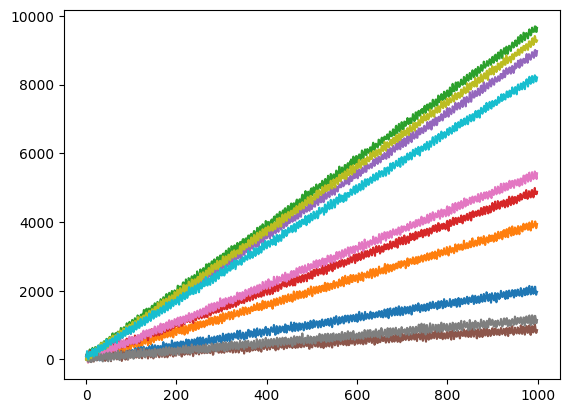

In [9]:
for series in time_series['HF_mono_inc']:
    plt.plot(series['time'], series['value'])

# Generate multiple series of monotonically decreasing values with noise

In [10]:
for i in range(10):
    if 'HF_mono_dec' not in time_series:
        time_series['HF_mono_dec'] = []
    time_series['HF_mono_dec'].append(construct_mono_decreasing_linear(1000))

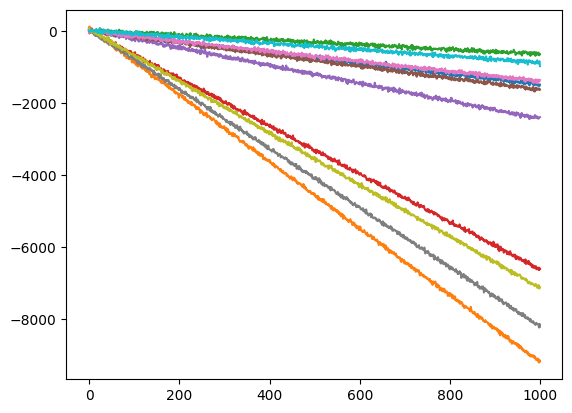

In [11]:
for series in time_series['HF_mono_dec']:
    plt.plot(series['time'], series['value'])

# Generate multiple series of stationary trend with noise

In [12]:
for i in range(10):
    if 'HF_mono_stat' not in time_series:
        time_series['HF_mono_stat'] = []
    time_series['HF_mono_stat'].append(construct_mono_stationary(1000))

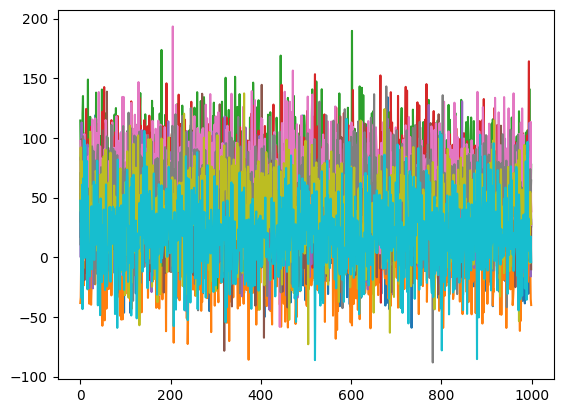

In [13]:
for series in time_series['HF_mono_stat']:
    plt.plot(series['time'], series['value'])

# Data preparation

In [14]:
# Create a 2D empty numpy array of 30 rows and 1000 columns
data_x = np.empty((30, 1000))
data_y = np.array([])


insertion_index = 0
for key, value in time_series.items():
    for i in range(len(value)):
        data_x[insertion_index] = value[i]['value']
        data_y = np.append(data_y, key)
        insertion_index += 1

data_y.flatten()

array(['HF_mono_inc', 'HF_mono_inc', 'HF_mono_inc', 'HF_mono_inc',
       'HF_mono_inc', 'HF_mono_inc', 'HF_mono_inc', 'HF_mono_inc',
       'HF_mono_inc', 'HF_mono_inc', 'HF_mono_dec', 'HF_mono_dec',
       'HF_mono_dec', 'HF_mono_dec', 'HF_mono_dec', 'HF_mono_dec',
       'HF_mono_dec', 'HF_mono_dec', 'HF_mono_dec', 'HF_mono_dec',
       'HF_mono_stat', 'HF_mono_stat', 'HF_mono_stat', 'HF_mono_stat',
       'HF_mono_stat', 'HF_mono_stat', 'HF_mono_stat', 'HF_mono_stat',
       'HF_mono_stat', 'HF_mono_stat'], dtype='<U32')

# Baseline Random Forest (every value of the time series is a feature)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(n_estimators=100)

# Randomly shuffle the data
indices = np.arange(data_x.shape[0])
np.random.shuffle(indices)
data_x = data_x[indices]
data_y = data_y[indices]

# Split the data into training and testing sets
train_x = data_x[:20]
train_y = data_y[:20]
test_x = data_x[20:]
test_y = data_y[20:]

# Train the classifier
classifier.fit(train_x, train_y)

# Predict the labels of the test set
pred_y = classifier.predict(test_x)

# Print the accuracy
print(accuracy_score(test_y, pred_y))

0.9


# Rocket Classifier

In [16]:
from sktime.classification.kernel_based import RocketClassifier

rocket = RocketClassifier()
rocket.fit(train_x, train_y)
pred_y = rocket.predict(test_x)
print(accuracy_score(test_y, pred_y))

1.0


# HIVE-COTE Classifier

In [17]:
from sktime.classification.hybrid import HIVECOTEV2

hivecote = HIVECOTEV2(time_limit_in_minutes=1)
hivecote.fit(train_x, train_y)
pred_y = hivecote.predict(test_x)
print(accuracy_score(test_y, pred_y))

1.0


# TSFresh features